<a href="https://colab.research.google.com/github/pikey-msc/CursoDF/blob/master/pikey-msc/CursoDF/M3/M%C3%B3dulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!git clone 'https://github.com/pikey-msc/CursoDF'

fatal: destination path 'CursoDF' already exists and is not an empty directory.


In [58]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Regresión lineal

En el análisis de regresión lineal múltiple se utiliza más de una variable explicativa, se busca definir que, del conjunto de variables, cuales son las que más influyen. Los valores de la variable dependiente $Y$ se generan a partir de una combinación lineal de los valores de una o más variables explicativas y un término aleatorio
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k + u$ 
Los coeficientes son elegidos de forma que la suma de cuadrados entre los valores observados y los pronosticados sea mínima, es decir, que se va a minimizar la varianza residual.

En la práctica se debe elegir cuidadosamente las variables que se consideraran como explicativas. Algunos criterios que deben de cumplir son los siguientes:

*   Tener sentido numérico
*   Evitar variables repetidas o redundantes

*   Justificación teórica
*   La relación entre variables explicativas en el modelo y casos debe de ser como mínimo de 1 a 10

*   La relación de las variables explicativas con la variable dependiente debe de ser lineal, es decir, proporcional

El modelo de regresión múltiple debe cumplir con las siguientes hipótesis:


1.   Linealidad: Los valores de la variable dependiente están generados por el siguiente modelo lineal: $Y=X \beta +U$
2.   Homocedasticidad: Las perturbaciones tienen la misma varianza $V(u_i)=\sigma^2$

1.   Independencia: Las perturbaciones aleatorias son independientes entre sí.
2.   Normalidad: La distribución de la perturbación aleatoria es normal
1.   Las variables explicativas $X_k$ se obtienen son errores de medida







In [59]:
%%R
#Instalamos las bibliotecas que utilizaremos
install.packages("MPDiR")    # Donde estan los datos Chromatic
install.packages("dplyr")    # Para manipulación de datos
install.packages("ggplot2")  # Para poder gráficar
install.packages("lattice")  # Para poder graficar xyplot y condicionados
install.packages("readxl")   # Para abrir archivos en excel
install.packages("MASS")     # Para hacer regresiones de tipo binomial negativa
install.packages("caret")
install.packages("caret")    # Permite evaluar los modelos de regresion
install.packages("plotly")   # Para hacer gráficos dinámicos
install.packages("mlbench")  # Permite obtener los datos de Sonar
install.packages("e1071")    # Solucion error caret
install.packages("caTools")  # Permite calcular el score AUC de la Curva ROC
install.packages("matlib")

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/MPDiR_0.1-16.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 171284 bytes (167 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/di

In [0]:
%%R
library(MPDiR)    # Donde estan los datos Chromatic
library(dplyr)    # Para manipulación de datos
library(ggplot2)  # Para poder gráficar
library(lattice)  # Para poder graficar xyplot y condicionados
library(readxl)   # Para abrir archivos en excel
library(MASS)     # Para hacer regresiones de tipo binomial negativa
library(caret)
library(caret)    # Permite evaluar los modelos de regresion
library(plotly)   # Para hacer gráficos dinámicos
library(mlbench)  # Permite obtener los datos de Sonar
library(e1071)    # Solucion error caret
library(caTools)  # Permite calcular el score AUC de la Curva ROC
library(matlib)

Leemos el dataset con el que se generará el modelo lineal

In [61]:
%%R
data<-read.csv('/content/CursoDF/M3/Datos/ventas.csv')
str(data)
summary(data)

'data.frame':	22 obs. of  3 variables:
 $ ventas  : int  973 1119 875 625 910 971 931 1177 882 982 ...
 $ tv      : int  10 10 25 25 30 30 35 35 40 40 ...
 $ internet: int  40 40 25 25 30 30 35 35 25 25 ...
     ventas           tv           internet    
 Min.   : 625   Min.   :10.00   Min.   :10.00  
 1st Qu.: 941   1st Qu.:31.25   1st Qu.:25.00  
 Median :1148   Median :45.00   Median :30.00  
 Mean   :1225   Mean   :44.09   Mean   :30.91  
 3rd Qu.:1500   3rd Qu.:58.75   3rd Qu.:38.75  
 Max.   :1866   Max.   :70.00   Max.   :45.00  


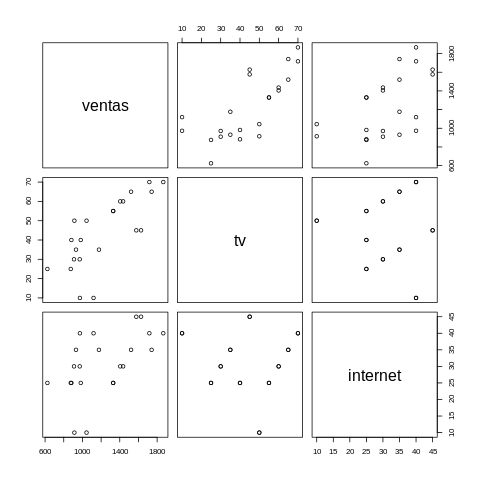

In [62]:
%%R
plot(data)

La prueba de hipótesis es:

*   Hipótesis nula: Coeficientes Bi=0
*   Hipótesis alternativa: Coeficientes Bi!=0





In [63]:
%%R
modelo<-lm(ventas~.,data = data)
summary(modelo)


Call:
lm(formula = ventas ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-245.72  -78.50   20.10   66.06  207.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -84.541    111.806  -0.756    0.459    
tv            14.857      1.464  10.146 4.16e-09 ***
internet      21.179      2.759   7.676 3.08e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 119.6 on 19 degrees of freedom
Multiple R-squared:  0.8916,	Adjusted R-squared:  0.8802 
F-statistic: 78.15 on 2 and 19 DF,  p-value: 6.797e-10



F-statistic es 78.5, significa que nuestro modelo tiene un mejor ajuste que un modelo con coeficientes B=0. Podemos rechazar la hipótesis nula.

In [0]:
%%R
e<-data$ventas-modelo$fitted.values


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.97491, p-value = 0.8209



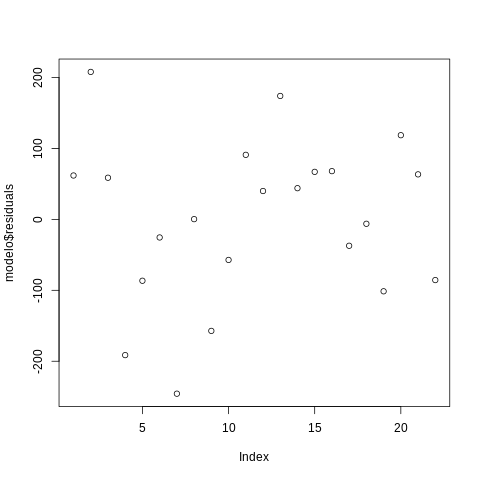

In [65]:
%%R
print(shapiro.test(modelo$residuals))
plot(modelo$residuals)

De la prueba, el p-value > 0.05 implica que la distribución del error no tiene diferencia significativa con una distribución normal.

## Modelo lineal generalizado

Cuando la estadística decriptiva de los datos Y no sigue una tendencia lineal y la varianza de Y depende de la media se usan los Modelo Lineales Generalizados (**LGM**)

Un GLM está compuesto por un predictor lineal 
$n_i=B_0 + B_1x_1 i+...+B_p x_p i $

Y dos funciones:

La función liga que describe la dependencia que existe entre la media y el predictor lineal

 $E[Y_i]=M_i$
 
 $g(M_i)=\eta_i$

La funcion de la varianza que describe la relacion entre la varianza sobre la media

$Var(y_i)=\phi V(M) $

La mayoria de las distribuciones mas utilizadas son miembros de la familia de distribucion exponencial (Ejemplo: Normal, Binomial o Poisson)

Las funciones de la familia exponencial disponibles en R son:

 - binomial(link = "logit")

 - gaussian(link = "identity")
 
 - Gamma(link = "inverse")
 
 - inverse.gaussian(link = "1/mu2")
 
 - poisson(link = "log")


### Metricas importantes de los Modelos de Regresión

- Akaike Information Criterion

- Deviance

- Root Mean Squared Error

- Confusion Matrix


#### Akaike Information Criterion

$AIC = 2k - 2ln(L)$

donde:

$L=p(x|\theta,M)$



*   $L$ es el valor maximizado de la función de verosimilitud
*   $x$ son los valores observados

*   $k$ es el número de parámetros del modelo

Consideraciones importantes:


*   Cuando se evaluan dos modelos con la misma información y las mismas variables respuestas el modelo con **MENOR AIC** es considerado mejor.
*   Entre mas complejo sea el modelo (mayor cantidad de parámetros k), mayor sera la posibilidad de que el AIC sea mayor

*   El indicador **AIC NO** indica la si la calidad del modelo es buena. Si ambos modelos candidatos se ajustan pobremente, el indicador AIC no generara una alerta de ello



#### Deviance

Se utiliza para medir la calidad de ajuste estaditico.

$D(y)=−2(log(p(y|θ0))−log(p(y|θs)))$

La Devianza Residual mide la diferencia que existe entre el Modelo Saturado y el modelo Propuesto.

La Devianza Nula mide la diferencia que existe entre el Modelo Saturado y el modelo Nulo

Se considera que un buen modelo es aquel cuya diferencia es CERCANA A CERO tanto para la Devianza Residual como para la Devianza Nula

Si la Deviaza en ambos casos es igual a cero se considera que el ajuste es perfecto. Si la Devianza es mayor a cero se dice que existe “Sobre-dispersión”

El modelo Saturado asume que cada punto tiene sus propios parametros (lo que significa que tiene n parametros)

El modelo Nulo asume exactamente lo contrario, un solo parametro para todos los puntos, por lo que solo se estima un parametro.

El modelo Propuesto asume que los puntos son modelados mediante p parametros mas un término de intercepción, por tanto que tiene $p + 1$ parámetros.


#### RMSE (Root Mean Squared Error)

$RMSE = \sqrt{\frac1n\sum_{i=1}^n(\hat{y}-y)^2}$

Donde:

$\hat{y}$ es la variable predecida

$y$ es la variable real

Tener un $RMSE = 0 $ es ideal pero no es posible en la mayoría de las situaciones. Un $RMSE = 0$ significa que el estimador predice las observaciones con una precisión perfecta.
La validación cruzada corresponde a repetir n veces el calculo del $RMSE$ al separar de manera aleatoria n veces los datos en train y test.

#### Matriz de confusión

La matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

Indicadores:

Accuracy: Que tan seguido la clasificación es correcta.

$\frac{TP+TN}{Total}$

True Positive Rate: Que tan seguido la predicción es Positiva

$\frac{TP}{TotalP}$

False Positive Rate: Que tan seguido la predicción es Negativa

$\frac{FP}{TotalF}$

Specificity: Que tan seguido la clasificación y la predicción es Negativa

$1−\frac{FP}{TotalF}$

Null Error Rate: Que tan seguido la clasificación es incorrecta

$\frac{TN+FP}{Total}$

$\kappa$: Mide la diferencia entre Accuracy y Null Error Rate. entre mas grande esta métrica, mayor la diferencia

Ejemplo de *Matriz de Confuisión*


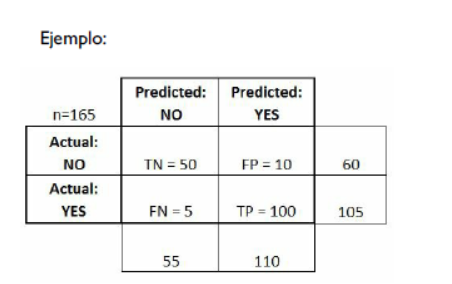

#### CURVA ROC
El análisis de la curva ROC, proporciona herramientas para seleccionar los modelos posiblemente óptimos y descartar modelos subóptimos.

Para dibujar una curva ROC sólo son necesarias las razones de True Positive Rate (TP) y de False Positive Rate (FP).

El mejor método posible de predicción se situaría en un punto en la esquina superior izquierda, o coordenada (0,1) del espacio ROC, representando un 100% de sensibilidad (ningún falso negativo) y un 100% también de especificidad (ningún falso positivo). A este punto (0,1) también se le llama una clasificación perfecta.

Los siguientes datos obtenidos en Zuur, Ieno y Hilbe [Zuur AF, Hilbe JM and Ieno EN, Beginner’s Guide to GLM and GLMM with R (2013). Springer Science Business Media New York 2007] mide la abundancia de peces a distintas profundidades, en dos periodos temporales (1979-1989 vs 1997-2002) en Atlántico noroeste. Durante el segundo periodo se desarrollo mucho la actividad pesquera comercial, que se sospecha tuvo impacto en las comunidades oceanicas. Examinaremos si la relación entre la riqueza y la profundidad ha cambiado de la base Baileyetal2008.xls

Son 148 registros en donde se indica la abundancia de peces (# de peces), la densidad, la profundidad promedio, el año, el periodo a que corresponde, las coordenadas X y Y en Km y el área de captura

In [0]:
%%R
# La opción na.action nos permite indicar que debe hacer el modelo ante variables Nulas.
# Por defalut tiene na.fail el cual dará un error en el modelo,
# Se puede cambiar a na.omit si se desean omitir los valores *Nulos*

# La opción data permite incluir la base con las columnas que deseamos utilizar para hacer el modelo.

#  residuals()     Muestra los residuales
#  fitted()        Muestra la predicción despues de aplicar la inversa de la función liga  
#  predict()       Muestra la predicción antes de aplicar la inversa de la función liga
#  Tambien es utilizado para predecir la variable respuesta (response) en nuevos datos

#  coefficients()  Muestra los coeficientes
 
#  deviance()      Muestra la devianza  
 
#  formula()       Muestra la formula   
 
#  summary()       Muestra el resumen

In [0]:
%%R


In [52]:
%%R
data(Chromatic)           # Bajamos los datos
cromatico <- Chromatic    # Guardamos los datos

print(head(cromatico))
colnames(cromatico) <- c("Log2Edad","Edad","Deterioro","Anomalia") 
summary(cromatico)  

   Log2Age  Age  Thresh   Axis
1 -2.00000 0.25 0.01861 Protan
2 -1.78588 0.29 0.03024 Protan
3 -1.78588 0.29 0.02700 Protan
4 -1.59946 0.33 0.01542 Protan
5 -1.59946 0.33 0.01585 Protan
6 -1.59946 0.33 0.03132 Protan
    Log2Edad           Edad          Deterioro          Anomalia  
 Min.   :-2.000   Min.   : 0.250   Min.   :0.000410   Deutan:172  
 1st Qu.:-0.415   1st Qu.: 0.750   1st Qu.:0.001783   Protan:172  
 Median : 0.000   Median : 1.000   Median :0.006547   Tritan:167  
 Mean   : 1.390   Mean   : 9.961   Mean   :0.008392               
 3rd Qu.: 3.170   3rd Qu.: 9.000   3rd Qu.:0.010890               
 Max.   : 6.426   Max.   :86.000   Max.   :0.059400               


In [55]:
%%R
Cromatico_P<-cromatico%>%filter(Anomalia == "Protan") # Protanopía
print(Cromatico_P)
summary(Cromatico_P)

    Log2Edad  Edad Deterioro Anomalia
1   -2.00000  0.25  0.018610   Protan
2   -1.78588  0.29  0.030240   Protan
3   -1.78588  0.29  0.027000   Protan
4   -1.59946  0.33  0.015420   Protan
5   -1.59946  0.33  0.015850   Protan
6   -1.59946  0.33  0.031320   Protan
7   -1.39593  0.38  0.010890   Protan
8   -1.39593  0.38  0.020520   Protan
9   -1.25154  0.42  0.010890   Protan
10  -1.25154  0.42  0.019440   Protan
11  -1.00000  0.50  0.008764   Protan
12  -1.00000  0.50  0.008476   Protan
13  -0.88897  0.54  0.019350   Protan
14  -0.88897  0.54  0.020850   Protan
15  -0.78588  0.58  0.019590   Protan
16  -0.78588  0.58  0.004448   Protan
17  -0.78588  0.58  0.010890   Protan
18  -0.66658  0.63  0.014690   Protan
19  -0.66658  0.63  0.008856   Protan
20  -0.66658  0.63  0.011700   Protan
21  -0.66658  0.63  0.020520   Protan
22  -0.66658  0.63  0.024410   Protan
23  -0.57777  0.67  0.006943   Protan
24  -0.57777  0.67  0.010890   Protan
25  -0.57777  0.67  0.021610   Protan
26  -0.57777

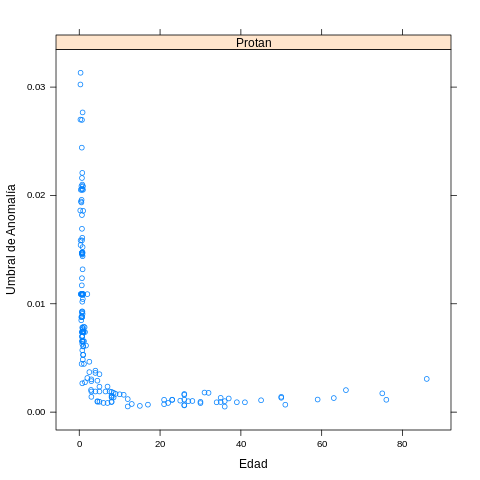

In [56]:
%%R
xyplot(Deterioro ~ Edad | Anomalia, data = Cromatico_P,xlab = "Edad", ylab = "Umbral de Anomalía")

In [0]:
%%R


[1] "complex"


## Creación de vectores y matrices

Función c() para crear vectores
Esta función crea vectores a partir de elementos individuales, esto quiere decir, que el usuario intruduce dichos valores. No importa que los vectores guarden la misma información, cada uno de ellos se diferencia por el nombre de asignación. Esta función concatene varios elementos del mismo tipo, cuando se imprime el vector se hace en un renglón que comienza con el símbolo ‘[1]’, indicando con ello que el primer elemento del renglón corresponde al primer elemento del vector.

In [0]:
%%R


[1]  5 10 15 20
[1] "numeric"
[1]  4  8 12 16
[1]  5 10 15 20
[1] "numeric"


Ejercicio. Construir un objeto a que contenga los elementos 2 y 4. 

1.   Construir un objeto a que contenga los elementos 2 y 4. También hacerlo para b, pero en ese caso que contenga del 2 al 4.
2.   Crear un vector que contenga una secuencia de 5 en 5, partiendo del número 5 al 35 y otra de 3 en 3, partiendo del 7 hasta el 80 (utilice la función seq).

Matrices. Las matrices también se pueden crear de manera flexible con función *matrix*, la cual permite alterar la secuencia por default de armado de la matriz; esto es, poder armar la matriz por filas y no por columnas.

In [0]:
%%R


In [0]:
%%R
print(mat2)

     [,1] [,2] [,3] [,4]
[1,]   21   22   23   24
[2,]   25   26   27   28
[3,]   29   30   31   32
[4,]   33   34   35   36
[5,]   37   38   39   40


In [0]:
%%R


In [0]:
%%R
mat2

                  Tipo A Tipo B Tipo C Tipo D
ID Alumno             21     22     23     24
ID Profesor           25     26     27     28
ID Administrativo     29     30     31     32
ID Investigador       33     34     35     36
ID Interino           37     38     39     40


Ejercicio.

1.   Crear una matriz que muestre las ganancias en millones de dólares dentro y fuera de E.U.A, de las siguientes películas: Episodio IV (E.U.A=460, O.P=314), Episodio V (E.U.A=290, O.P=247) y Episodio VI (E.U.A=309, O.P=165)
2.   Asignar nombre a filas y columnas a la matriz star_wars_matriz



Funciones rbind() y cbind()


In [0]:
%%R


     [,1] [,2] [,3]
[1,]  1.5  2.7 -3.9
[2,]  1.4 -1.1  2.1
     [,1] [,2] [,3]
[1,]    2  1.0    5
[2,]    4  0.5    8
[3,]    6  1.0    0
[4,]    8  0.3    1


Listas
Una lista en R permite reunir una variedad de objetos bajo un nombre (es decir, el nombre de la lista) de una manera ordenada. Estos objetos pueden ser matrices, vectores, marcos de datos, incluso otras listas, etc. No se requiere que estos objetos estén relacionados entre sí de ninguna manera.

Una lista, de la clase list(), es una clase de datos que puede contener cero o más elementos, cada uno de los cuales puede ser de una clase distinta.

Por ejemplo, se puede concebir una lista para representar una familia: mamá, papá, años de casados, hijos, y edad de los hijos. Esto quiere decir, que dicha lista tiene información alfanumérica.

In [0]:
%%R


[[1]]
[1] "Gabriela"

[[2]]
[1] "Mauricio"

[[3]]
[1] 25

[[4]]
[1] "Alain"    "Priscila"

[[5]]
[1] 18 15

$Madre
[1] "Gabriela"

$Padre
[1] "Mauricio"

$casados
[1] 25

$Hijos
[1] "Alain"    "Priscila"

$Edades
[1] 18 15



# Dataframes


Es un tipo de variable cuyos componentes pueden ser vectores, matrices o factores, con la única excepción de que las longitudes, o número de renglones, en el caso de matrices, deben coincidir con todos los componentes. La apariencia de un data frame es de una tabla, una forma de crearlos es mediante la función data.frame()

In [0]:
%%R


    Nombre Edad Delegacion Sexo Casado
1  Alondra   37 Xochimilco    M  FALSE
2 Berenice   34  Iztacalco    M   TRUE
3    Jorge   40 Iztapalapa    H   TRUE
4   Melina   25    Tlalpan    M  FALSE
5  Eleazar   29   Coyoacan    H   TRUE


In [0]:
%%R


NULL


# Estructuras de control y manejo de datos


En R son semejantes a la de otros lenguajes de programación, la construcción en sí misma regresa un valor, que puede, si se quiere, ser asignado a una variable o utilizado de otras maneras.

La construcción de un IF admite una sola expresión, pero esta puede ser compuesta, la cual se construye con llaves { }, y las expresiones en su interior, separadas ya sea por el cambio de renglón o por ‘;’.

In [0]:
%%R


In [0]:
%%R
# Función que determina si un entero es mayor que 8


[1] "x es menor que 8"
[1] "x es mayor o igual que 8"
[1] "x es mayor o igual que 8"


Crear un IF donde se muestre que cualquier número entero menor a 10 tiene un rango bajo, mayor a 10 pero menor a 20 pertenece a un rango medio, y si es mayor a 20 entonces tendrá un rango alto.

In [0]:
%%R


In [0]:
%%R


[1] "RANGO BAJO"
[1] "primer renglon"
[1] "segundo renglon"
[1] "RANGO MEDIO"
[1] "RANGO ALTO"
[1] "RANGO ALTO"


El número de veces que se repite la expresión o expresiones englobadas en la instrucción, puede estar explícita en ella misma.

In [0]:
%%R


[1] 1
[1] 4
[1] 9
[1] 16
[1] 25
[1] 36
[1] 49
[1] 64
[1] 81
[1] 100
[1] 121
[1] 144
[1] 169
[1] 196
[1] 225


In [0]:
%%R


[1] "C"
[1] "A"
[1] "L"
[1] "O"
[1] "R"


WHILE
Con while se llevan a cabo repeticiones bajo una condición

In [0]:
%%R


SyntaxError: ignored

In [0]:
%%R


## Funciones apply,lapply,sapply

Función apply
Esta función permite un manejo eficiente de conjuntos grandes de datos. Con ella, se puede realizar la misma operación en todas las filas y columnas de una matriz. Únicamente hay que indicar la operación que se realizará en los datos y el índice/índices sobre los cuales ha de llevarse a cabo.

In [0]:
%%R
#Construir una matriz que contenga 10 filas, 5 columnas, y sumar cada una de sus filas.

In [0]:
%%R
#Sumar los elementos de cada una de sus columnas.




In [0]:
%%R
#e puede obtener información específica de los elementos contenidos en la matriz.


Funciones lapply y sapply. Son utilizadas para aplicar el mismo comando a todas las varibales de una lista, lapply aplica una función a cada elemento de una lista (el resultado es otra lista). Sapply actúa igual, pero el resultado es un vector o una matriz.

In [0]:
%%R


## Ejercicios


Un grupo de amigos está formado por Ana de 23 años, Luis de 24 años, Pedro de 22, Juan de 24, Eva de 21 y Jorge de 22 años. Crea los vectores correspondientes a nombre, edad y sexo. (Usa la codificación M=mujer, H=hombre). Con los datos anteriores crea un dataframe con los vectores nombre, edad y sexo.

Imprima los primeros 10 números de la serie Fibonacci

In [0]:
%%R


[1] "First 10 Fibonacci numbers:"
 [1]   1   1   2   3   5   8  13  21  34  55  89 144 233


Sumar los enteros positivos hasta que la suma pase de 500

In [0]:
%%R


[1] 1
[1] 1
[1] 3
[1] 2
[1] 6
[1] 3
[1] 10
[1] 4
[1] 15
[1] 5
[1] 21
[1] 6
[1] 28
[1] 7
[1] 36
[1] 8
[1] 45
[1] 9
[1] 55
[1] 10
[1] 66
[1] 11
[1] 78
[1] 12
[1] 91
[1] 13
[1] 105
[1] 14
[1] 120
[1] 15
[1] 136
[1] 16
[1] 153
[1] 17
[1] 171
[1] 18
[1] 190
[1] 19
[1] 210
[1] 20
[1] 231
[1] 21
[1] 253
[1] 22
[1] 276
[1] 23
[1] 300
[1] 24
[1] 325
[1] 25
[1] 351
[1] 26
[1] 378
[1] 27
[1] 406
[1] 28
[1] 435
[1] 29
[1] 465
[1] 30
[1] 496
[1] 31
[1] 528
[1] 32
